## 5.2 Calc. MCMC

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pymc3 as pm

In [38]:
file_beer_sales_1=pd.read_csv('./data/2-4-1-beer-sales-1.csv')
# listにまとめる
data_list=file_beer_sales_1['sales'].values.tolist()

In [39]:
with pm.Model() as model:
    data = pm.Data('data', data_list)
    mu = pm.Uniform('mu', 0, 200)
    sigma = pm.Uniform('sigma',  0, 100)
    pm.Normal('y', mu=mu, sigma=sigma, observed=data_list)

## 5.3 Extract MCMC sample

In [40]:
with model:
    trace = pm.sample(start=pm.find_MAP(), step=pm.NUTS(), draws=1000,tune=1000, chains=4, random_seed=1)

logp = -440.13, ||grad|| = 0.014865: 100%|████████████████████████████████████████████| 13/13 [00:00<00:00, 232.76it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 8000/8000 [00:43<00:00, 183.92draws/s]


In [48]:
# クラスの確認
print(type(trace))

<class 'pymc3.backends.base.MultiTrace'>


In [65]:
# 要素数の確認
print(trace)

<MultiTrace: 4 chains, 1000 iterations, 4 variables>


In [66]:
# 1つ目のchainの最初のMCMCサンプル
trace.get_values('mu',chains=0)[0]

103.69505624476542

In [60]:
# 1つ目のchainで得られたすべてのMCMCサンプル(バーンイン後)
trace.get_values('mu',chains=0)

array([103.69505624, 101.44116352, 103.8747322 , 101.21851237,
       100.36823554, 102.64114278, 101.03910974, 103.23184432,
       108.17805325, 105.89635604, 100.48315483, 100.01433528,
       104.4873604 , 103.774493  , 105.09170913, 104.87449939,
       105.01157107, 101.81543597,  96.81649029, 106.65909547,
        98.85740935, 101.98969195, 103.90018784,  99.23866413,
        99.23866413, 100.9354902 , 102.72235975, 104.38370182,
       104.41682153, 102.06814648, 103.32711762, 102.21834917,
       100.37196561, 102.69569771, 102.69569771, 101.3731036 ,
       103.05887481, 102.13715174, 106.24038064, 101.49515851,
       102.56654026, 102.56654026, 101.01333697, 106.03237807,
        99.91038919, 103.4342416 , 102.207262  , 101.31821617,
       101.73661619,  99.21422445, 103.17074182, 103.17074182,
       100.66654567, 104.53275098, 101.0800795 , 101.60492574,
       108.34259669, 106.84931022, 106.93419405, 106.72395004,
       107.43623843, 108.96642062, 102.87197531, 101.68

In [71]:
# 要素数は1000
print(trace.get_values('mu',chains=0,combine=False).shape[0])

1000


In [73]:
# 4つのチェーンすべてのサンプル数
print(trace.get_values('mu').shape[0])

4000


In [74]:
# pymcではチェインごとのサンプルがすべて縦に連なる
print(trace.get_values('mu').shape)

(4000,)


## 5.4 Calc. the representation of MCMC sampling

In [91]:
# 事後中央値
np.median(trace.get_values('mu'))

102.17812463759472

In [92]:
# 事後期待値
np.mean(trace.get_values('mu'))

102.18370255849229

In [95]:
# 95%ベイズ信用区間
np.quantile(trace.get_values('mu'),q=[0.025,0.975])

array([ 98.5969137 , 105.84153466])

In [96]:
# サンプルの要約統計量
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,102.184,1.841,98.853,105.661,0.030,0.021,3765.0,3757.0,3795.0,2536.0,1.0
sigma,18.178,1.356,15.606,20.589,0.022,0.016,3767.0,3719.0,3803.0,2579.0,1.0


## 5.5 Trace Plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5B44719E8>,
      dtype=object)

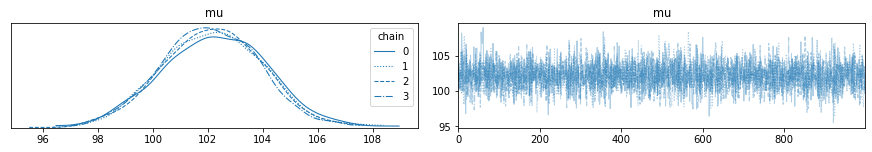

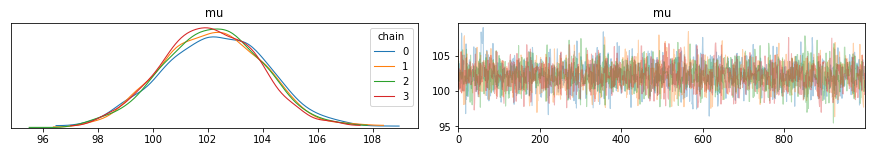

In [97]:
import arviz as az
# 収束チェック
pm.traceplot(trace,var_names='mu',legend=True)
az.plot_trace(trace, var_names=('mu'),legend=True)

## 5.6 posterior visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5B1111550>],
      dtype=object)

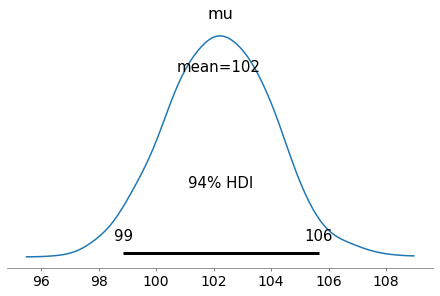

In [82]:
pm.plot_posterior(trace,var_names='mu')

## 5.8 事後分布の範囲の比較

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5B2CA7BE0>],
      dtype=object)

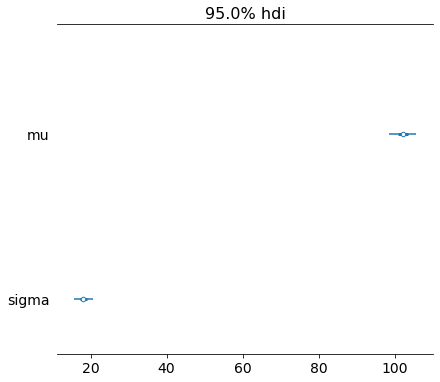

In [103]:
pm.forestplot(trace,combined=True,hdi_prob=0.95)

## 5.9 Evaluation of Autocorrelation MCMC sampling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5B42D3438>,
      dtype=object)

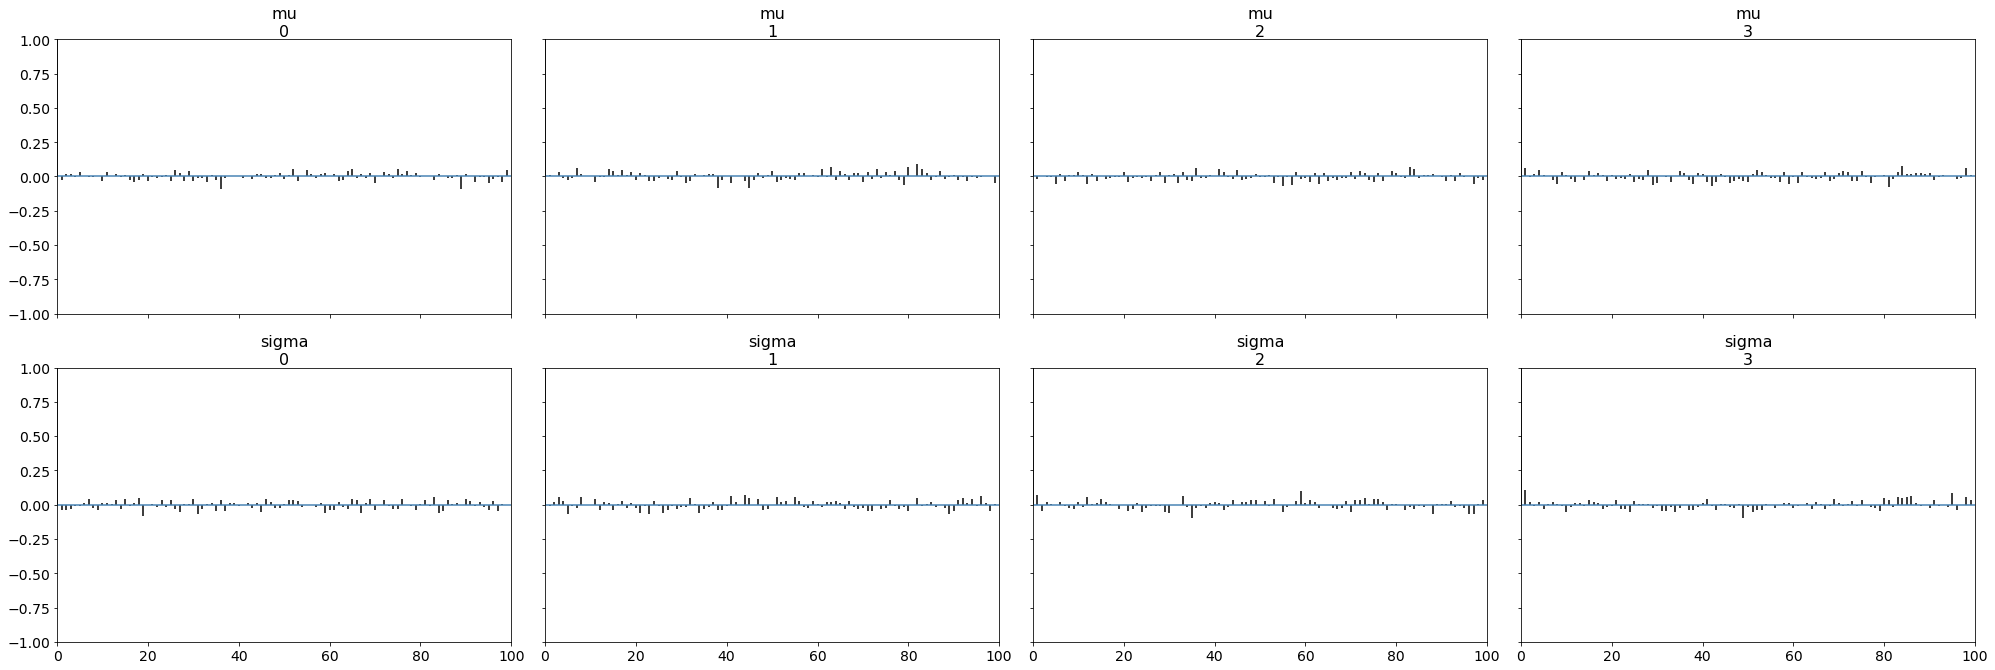

In [108]:
pm.autocorrplot(trace)

## 5.11 Data and Model for checking posterior

In [112]:
animal_num=pd.read_csv('./data/2-5-1-animal-num.csv')
# listにまとめる
animal_list=animal_num['animal_num'].values.tolist()

In [113]:
print(animal_list)

[0, 1, 1, 2, 0, 2, 3, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 4, 1, 2, 3, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 3, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 4, 1, 0, 0, 1, 3, 1, 3, 1, 0, 1, 0, 0, 1, 0, 1, 1, 4, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 1, 4, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 3, 1, 1, 1, 0, 3, 0, 1, 0, 2, 0, 2]


In [114]:
#　正規分布
with pm.Model() as normal_dist_model:
    data = pm.Data('data', animal_list)
    mu = pm.Uniform('mu', 0, 3)
    sigma = pm.Uniform('sigma',  0, 100)
    pm.Normal('y_pred', mu=mu, sigma=sigma, observed=animal_list)

In [116]:
# ポアソン分布
with pm.Model() as poisson_dist_model:
    data = pm.Data('data', animal_list)
    lamda = pm.Uniform('lamda', 0, 100)
    pm.Poisson('y_pred', lamda, observed=animal_list)

## 5.12 MCMC for checking posterior

histogram for actual animal num

In [121]:
with normal_dist_model:
    trace_normal = pm.sample(start=pm.find_MAP(), step=pm.NUTS(), random_seed=1)

logp = -608.89, ||grad|| = 7.4605e-05: 100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 230.11it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains, 3 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:32<00:00, 122.61draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [120]:
with poisson_dist_model:
    trace_poisson = pm.sample(start=pm.find_MAP(), step=pm.NUTS(), random_seed=1)

logp = -9,264.5, ||grad|| = 4,898.5: 100%|██████████████████████████████████████████████| 9/9 [00:00<00:00, 196.17it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lamda]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████| 4000/4000 [00:17<00:00, 86.80draws/s]


(array([64.,  0., 85.,  0.,  0., 39.,  0.,  8.,  0.,  4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

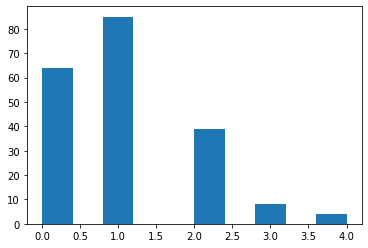

In [117]:
plt.hist(animal_list)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5B7064E48>],
      dtype=object)

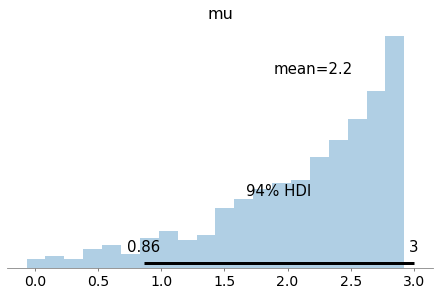

In [123]:
az.plot_posterior(trace_normal, var_names=['mu'], kind='hist')